In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import statsmodels
from statsmodels.stats import weightstats as stests

import seaborn as sns
import matplotlib.pyplot as plt

##### Нулевая гипотеза - когда нет разницы между группами
##### Альтернативая гипотеза - когда группы различаются

Задача проверки гипотезы - отвергнуть нулевую гипотезу, когда данные показывают разницу в метрике между выборками **на заданном уровне значимости**

***Важно:***<br>
Результатом проверки будет не факт приняли/отвергли, а <u>p-value</u> <br>
Мы задаем уровень значимости, например, 95%. И при данном уровне значимости мы определяем вероятность ошибки первого рода $a$ (1-0.95 = 0.05)<br>
Для отказа от нулевой гипотезы p-value должен быть меньше $a$

##### p-value
Вероятность совершить ошибку первого рода (допустить ложноположительное решение)

##### Ошибка первого рода ($а$-ошибка)
> Ложноположительный результат 

*Ошибочно отвергли нулевую гипотезу ->
Задетектировали эффект там, где его нет*

##### Ошибка второго рода ($в$-ошибка)
> Ложноотрицательный результат 

*Приняли неверную нулевую гипотезу ->
Решили, что нет эффекта, хотя он есть*

### Какие бывают статистические критерии?
> Если для расчета критерия нужен расчет какой-то метрики (параметра), то критерий называется **параметрическим**

> Если мы изменяем исходное распределение параметра, то используемый критнрий называется **непараметрическим**

### Параметрический критерий
> Используется при условии, когда нам известен тип распределения

Чтобы сравнить две выборки, мы можем расчитать t-значение

*Особенности:*
- t-критерий чувствителен к выбросам
- t-критерий можно применять к ненормальном распределенным величинам. Но главное, чтобы среднее выборок было нормально распредено

##### Создадим два случайных t-распределения метрик

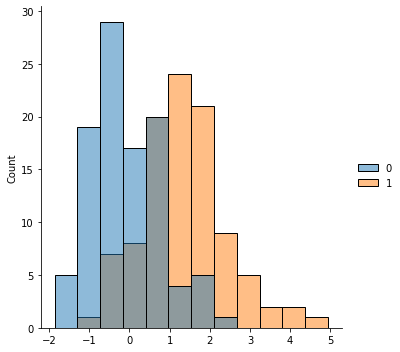

In [46]:
x = np.random.standard_t(30, 100)
y = np.random.standard_t(30, 100) + 1

sns.displot([x,y]);

##### Объявим входные данные

In [50]:
# Средние
mu_x = np.mean(x)
mu_y = np.mean(y)

# Дисперсии
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)

# Объемы выборок
n_x = x.size
n_y = y.size

##### Ручной расчет по формуле

In [51]:
# разница средних двух выборок
mu_ = mu_x - mu_y

# дисперсия двух выборок
se = np.sqrt(var_x / n_x + var_y / n_y)

# t-критерий
t_stat = mu_ / se

# Степени свободы
dof = n_x + n_y-2

# p-value
p_value = stats.t.sf(np.abs(t_stat), dof)*2

print('t-stat:', t_stat)
print('p-value:', p_value)

t-stat: -10.320929470550977
p-value: 2.943510307849066e-20


##### Два варианта пакетного решения

In [31]:
stats.ttest_ind(x, y, equal_var=True)

Ttest_indResult(statistic=-7.208739623945486, pvalue=1.1637973808297098e-11)

In [32]:
sm.stats.ttest_ind(x, y, usevar="pooled") 

(-7.208739623945488, 1.1637973808296885e-11, 198.0)

##### Доверительный интервал для t теста

In [56]:
stats.t.interval(.05, n_x-1, mu_x, n_x) 

(-6.345242622344205, 6.227947910525835)

#### В примере выше мы считали, что дисперсии в двух выборках равны
На малых выборках правильнее использовать модификацию Уэлша о неравенстве дисперсий. В этом случае число степеней свободы сокращается. За счет этого p-value увеличивается и мы получаем более выверенные результаты

In [33]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-7.208739623945486, pvalue=1.2292913923243362e-11)

In [34]:
sm.stats.ttest_ind(x, y, usevar="unequal") 

(-7.208739623945488, 1.2292913923243143e-11, 193.89585000876255)

#### t-критерий можно применять к ненормально распределенным величинам. Но главное, чтобы среднее выборок было нормально распредено

##### Пример для экспоненциального распределения
Если брать случайные подвыборки и считать их среднее, то эти средние будут нормально распределены
> Практичеки у любого популярного распределения выборочные средние будут нормально распределены

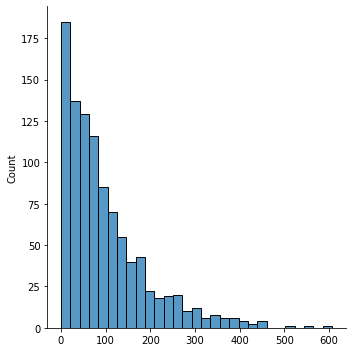

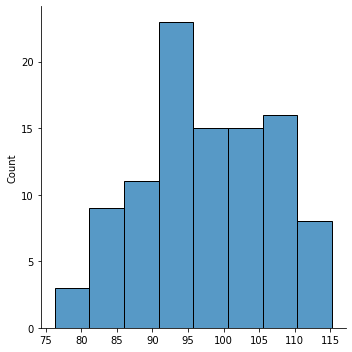

In [10]:
x = np.random.exponential(100, 1000)

mx = []
for i in range(100):
    rand_x = np.random.choice(x, 100)
    
    mx.append(np.mean(rand_x))

sns.displot(x);
sns.displot(mx);

### Критерии долей
Критерии, которые работают с распределениями Бернулли. 

#### Z-тест пропорций

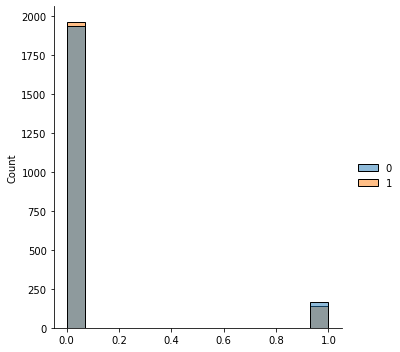

In [59]:
x = np.random.binomial(n=1, p=.0742, size=2100)
y = np.random.binomial(n=1, p=.0614, size=2100)

sns.displot([x,y]);

##### Объявим входные данные

In [60]:
n_x = x.size
n_y = y.size

# Вероятности совершения события (конверсии)
p_x = np.sum(x) / x.size
p_y = np.sum(y) / y.size

# Дисперсия для распределения Бернулли
var_x = p_x*(1-p_x)
var_y = p_y*(1-p_y)        

##### Ручной расчет по формуле

In [61]:
# Расчет z-статистики
z_stat = (p_x - p_y) / np.sqrt(var_x/n_x + var_y/n_y)

# Степени свободы
dof = n_x + n_y-2

# Расчет p-value
p_value = stats.t.sf(np.abs(z_stat), dof)*2

print('z-stat:', z_stat)
print('p_value:', p_value)

z-stat: 1.495961652701609
p_value: 0.13473881885246142


>  Важно заметить, что формулы для t-критерия z-теста для проверки пропорции одинаковы - разица средних делится на разницы дисперсий

##### Рассчитаем доверительный интервал для разницы долей
Мы видим, что доверительный интервал пересекает ноль. Это означает, что нулевая разница между долями попадает в границы доверительного интервала. Поэтому мы не может принять гипотезу о разницы долей при текущем уровне $aplha$

In [62]:
alpha = .05
z = stats.norm.ppf(1-alpha/2)

left = p_x - p_y - z * np.sqrt(var_x/n_x + var_y/n_y)
right = p_x - p_y + z * np.sqrt(var_x/n_x + var_y/n_y)

left, right

(-0.0036924992521133963, 0.027502023061637203)

#### Вариант пакетного решения

##### Расчет z теста

In [63]:
z_stat, p_value = statsmodels.stats.proportion.proportions_ztest([np.sum(x), np.sum(y)], 
                                                                 [n_x, n_y]
                                                                )
print('z-stat:', z_stat)
print('p_value:', p_value)

z-stat: 1.4955632625587927
p_value: 0.13476750263878146


##### Расчет доверительного интервала

In [64]:
statsmodels.stats.proportion.confint_proportions_2indep(
    count1 = np.sum(x),
    nobs1 = n_x,
    count2 = np.sum(y), 
    nobs2 = n_y
)

(-0.003729831406389158, 0.02759280356082872)

> Если доверительный интервал для доли перекрывает ноль, то отвергнуть нулевую гипотезу об отсутствии разницы нельзя

> p-value и доверительные интервалы - это две оценки, которые по своей эффективности равнозначны
Можно использовать оба метода для проверки гипотез. Но p-value удобнее благодаря своей однозначности

> Также метод метод оценки значимости с помощью p-value обладает большей мощностью. Иногда бывают ситуации, когда доверительные интервалы пересекаются, но по стат. критерию p-value оказывается ниже $alpha$, что отвергает нулевую гипотезу. Пример: https://statisticsbyjim.com/hypothesis-testing/confidence-intervals-compare-means/

### Непараметрические (ранговые) критерии
Используется для сравнения медиан распределения статистики двух независимых выборок в смысле линейного сдвига относительно центра симметрии

- Когда распределение данных неизвестно
    - Или когда распределение данных не описывается ни одним из стандартных распределений
- Но важно, чтобы распределения были похожи
- U-test не любит ранговые величины. Ранги возможны только если категорий очень много (а не 1/0)

#### Возьмем два разных распределения с близкими друг к другу средними

Mean for binomial distribution: 7.998
Mean for exponential distribution: 7.913011346739692


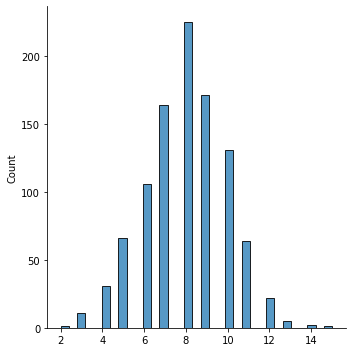

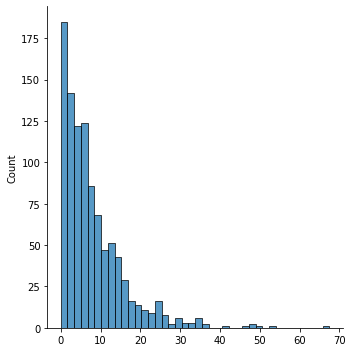

In [161]:
binom_distr = stats.binom.rvs(size = 1000, n=16, p=.5, random_state=17)
exp_distr = stats.expon.rvs(size = 1000, scale = 8, random_state=17)

print('Mean for binomial distribution:', binom_distr.mean())
sns.displot(binom_distr);

print('Mean for exponential distribution:', exp_distr.mean())
sns.displot(exp_distr);

#### Проверим гипотезу о разнице средних с помощью теста Манна-Уитни
Тест Манна-Уитни показал разницу в выборках

In [162]:
stats.wilcoxon(binom_distr, exp_distr)

WilcoxonResult(statistic=182285.0, pvalue=1.0098050114494714e-13)

#### Проверим гипотезу о разнице средних с помощью теста Стьюдента
А тест Стьюдента не отверг гипотезу о равенстве средних

In [163]:
stats.ttest_ind(binom_distr, exp_distr)

Ttest_indResult(statistic=0.33192168821075196, pvalue=0.7399832073803922)

##### Проверим как распределены выборочные средние у двух распределений

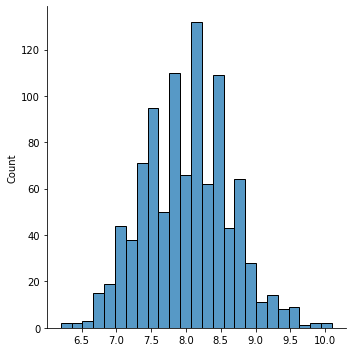

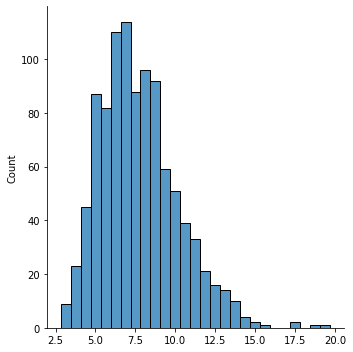

In [185]:
list_of_binom_means = []
list_of_expon_means = []

for i in range(1000):
    binom_var_mean = np.random.choice(binom_distr, 10).mean()
    expon_var_mean = np.random.choice(exp_distr, 10).mean()
    
    list_of_binom_means.append(binom_var_mean)
    list_of_expon_means.append(expon_var_mean)

sns.displot(list_of_binom_means);
sns.displot(list_of_expon_means);

##### Применим тест Шапиро-Уилка, чтобы оценить близость распределений выборочных средних к нормальному
Тест Шапиро-Уилка показывает, что оба распределения относятся к какому-то другому распределению<br>
Требование о нормальности выборочных средних не выполняется. Поэтому тест Стьюдента показывал неверные результаты

In [188]:
stats.shapiro(list_of_binom_means)

ShapiroResult(statistic=0.9945863485336304, pvalue=0.0011790265562012792)

In [189]:
stats.shapiro(list_of_expon_means)

ShapiroResult(statistic=0.9655272960662842, pvalue=1.2158855567073312e-14)

### Тесты на нормальность
Есть два основных теста на нормальность:
- Критерий Шапиро-Уилка
- Критерий Колмогорова-Смирнова

>$H0$: x взята из генеральной совокупности с нормальным распределением<br>
$H1$: x взята из генеральной совокупности с другим распределением

#### Критерий Шапиро-Уилка
- Является наиболее мощным тестом на проверку нормальности
- Работает для выборое менее 5000 наблюдений

#### Критерий Колмогорова-Смирнова
- Наиболее универсальныйс критерий (но менее точный в сравнении с Шапиро)

##### Создадим два распределения, нормальное и сильно похожее на него t-распределение

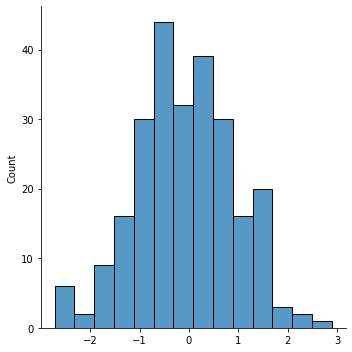

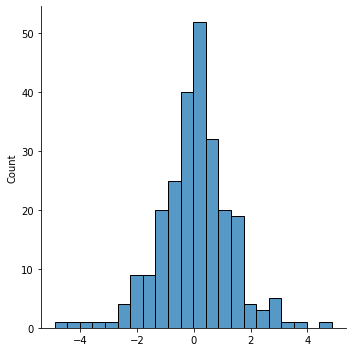

In [76]:
norm_distr = stats.norm.rvs(size = 250)
t_distr = stats.t.rvs(size = 250, df = 5)

sns.displot(norm_distr);
sns.displot(t_distr);

#### Проверим принадлежность выборок к нормальному распределению

##### Тест Колмогорова относит оба распределения к нормальному

In [77]:
print(stats.kstest(norm_distr, "norm"))
print(stats.kstest(t_distr, "norm"))

KstestResult(statistic=0.061408001286498703, pvalue=0.2904741973861128)
KstestResult(statistic=0.058408065184207825, pvalue=0.3476295511298353)


##### А тест Шапиро определяет наше t-распределеие как неотносящееся к нормальному

In [80]:
print(stats.shapiro(norm_distr))
print(stats.shapiro(t_distr))

ShapiroResult(statistic=0.9939581155776978, pvalue=0.41573888063430786)
ShapiroResult(statistic=0.9742836356163025, pvalue=0.0001700418652035296)
